In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from sklearn.preprocessing import Normalizer
%matplotlib inline
import seaborn as sns

In [5]:
collated_df = pd.read_csv("Collated.csv")
kcfsi = pd.read_csv("KCFSI.csv")

In [6]:
collated_df.head()

,T10Y3MM,T10Y2YM,TB3MS,FEDFUNDS,MPRIME,GS3M,T10YFFM,EXUSUK,GS10,GS2
0,0.31,0.12,7.64,8.23,10.11,7.90,-0.02,1.6512,8.21,8.09
1,0.47,0.10,7.74,8.24,10.00,8.00,0.23,1.6961,8.47,8.37
2,0.42,-0.04,7.90,8.28,10.00,8.17,0.31,1.6245,8.59,8.63
3,0.75,0.07,7.77,8.26,10.00,8.04,0.53,1.6372,8.79,8.72
4,0.75,0.12,7.74,8.18,10.00,8.01,0.58,1.6774,8.76,8.64


In [7]:
from sklearn.decomposition import PCA
sc = StandardScaler()
X_std = sc.fit_transform(collated_df)
X_norm = Normalizer().fit_transform(collated_df)

In [8]:
pca = PCA(n_components=1)
pca.fit(X_std)

svd = TruncatedSVD(n_components=1, n_iter=3)
svd.fit(X_std)

TruncatedSVD(algorithm='randomized', n_components=1, n_iter=3,
       random_state=None, tol=0.0)

In [9]:
collated_pca = pca.transform(collated_df)
svc_pca = svd.transform(collated_df)
X_std_pca = pca.fit_transform(X_std)
X_norm_pca = pca.fit_transform(X_norm)

In [40]:
collated_df['FEDFUNDS']

0      8.23
1      8.24
2      8.28
3      8.26
4      8.18
5      8.29
6      8.15
7      8.13
8      8.20
9      8.11
10     7.81
11     7.31
12     6.91
13     6.25
14     6.12
15     5.91
16     5.78
17     5.90
18     5.82
19     5.66
20     5.45
21     5.21
22     4.81
23     4.43
24     4.03
25     4.06
26     3.98
27     3.73
28     3.82
29     3.76
       ... 
304    0.12
305    0.13
306    0.13
307    0.14
308    0.14
309    0.12
310    0.12
311    0.24
312    0.34
313    0.38
314    0.36
315    0.37
316    0.37
317    0.38
318    0.39
319    0.40
320    0.40
321    0.40
322    0.41
323    0.54
324    0.65
325    0.66
326    0.79
327    0.90
328    0.91
329    1.04
330    1.15
331    1.16
332    1.15
333    1.15
Name: FEDFUNDS, Length: 334, dtype: float64

In [42]:
X_std_pca
X_std_pca_scaled = sc.fit_transform(X_std_pca)


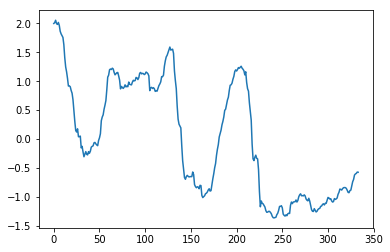

In [43]:
plt.plot(X_std_pca_scaled)

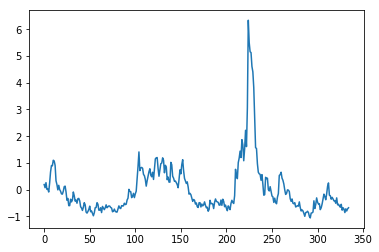

In [44]:
plt.plot(kcfsi)

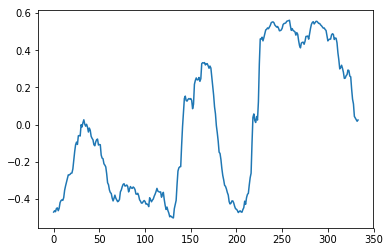

In [45]:
plt.plot(X_norm_pca)

In [52]:
x = pca.components_
x

array([[ 0.41013781,  0.34568261, -0.36042264, -0.38060612, -0.00894803,
        -0.37136124,  0.41938269,  0.16720942,  0.03877657, -0.30690604]])

In [62]:
fun =x[0][1] * collated_df['T10Y2YM']
fun1 = x[0][0] * collated_df['T10Y3MM']
fun2 = x[0][2] * collated_df['TB3MS']

In [63]:
total = fun + fun1 + fun2

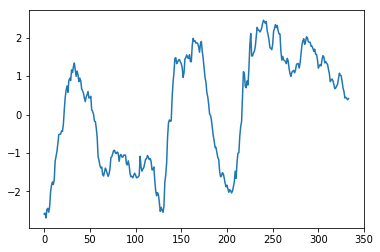

In [64]:
plt.plot(total)